<a href="https://colab.research.google.com/github/Hakman482/CNN-model/blob/main/InceptionV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

In [29]:
img_height, img_width = 150, 150
batch_size= 16

In [30]:
# data = tf.keras.utils.image_dataset_from_directory(data_dir)

data_dir = '/content/drive/MyDrive/newerDataset'
train_dir = '/content/drive/MyDrive/newerDataset/train'
valid_dir = '/content/drive/MyDrive/newerDataset/validation'

In [31]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    seed = 62,
    label_mode = 'categorical',
    image_size = (img_width, img_height),
    batch_size = batch_size,
    shuffle= False
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    valid_dir,
    seed = 62,
    label_mode = 'categorical',
    image_size = (img_width, img_height),
    batch_size = batch_size,
    shuffle=False

)

Found 228 files belonging to 3 classes.
Found 48 files belonging to 3 classes.


In [32]:
class_names = train_ds.class_names
true_labels = list(val_ds.map(lambda x, y: y))


# print(f"ClassNames: {class_names}")
# print(f"True Labels for Validation: {true_labels}")

In [33]:
data_augmentation = keras.Sequential([
      layers.experimental.preprocessing.RandomFlip(
          "horizontal",
          input_shape=(img_height, img_height, 3)
      ),
      layers.experimental.preprocessing.RandomFlip(
          "vertical",
          input_shape=(img_height, img_height, 3)
      ),
      layers.experimental.preprocessing.RandomRotation(0.1)
  ])

In [56]:
Inception_model = Sequential()

pretrained_model = tf.keras.applications.InceptionV3(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(img_height, img_height, 3),
    pooling='avg',
    classes=3,
    classifier_activation="softmax",
)

for layer in pretrained_model.layers:
    layer.trainable = False


Inception_model.add(data_augmentation)
Inception_model.add(pretrained_model)
Inception_model.add(Flatten())
Inception_model.add(Dense(128, activation='relu'))
Inception_model.add(Dense(64, activation='relu'))
Inception_model.add(Dense(3, activation='softmax'))

In [78]:
Inception_model.build(input_shape=(None,img_width,img_height,3))
Inception_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (None, 150, 150, 3)       0         
                                                                 
 inception_v3 (Functional)   (None, 2048)              21802784  
                                                                 
 module_wrapper_12 (ModuleWr  (None, 2048)             0         
 apper)                                                          
                                                                 
 module_wrapper_13 (ModuleWr  (None, 128)              262272    
 apper)                                                          
                                                                 
 module_wrapper_14 (ModuleWr  (None, 64)               8256      
 apper)                                                          
                                                      

In [58]:
Inception_model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss ='categorical_crossentropy',
    metrics=['accuracy']
)

In [59]:
epochs = 20
history = Inception_model.fit(
    train_ds,
    validation_data = val_ds,
    epochs =epochs,
    batch_size = batch_size
)

Epoch 1/20
15/15 [==============================] - 15s 769ms/step - loss: 9.1444 - accuracy: 0.3640 - val_loss: 4.4433 - val_accuracy: 0.2292
Epoch 2/20
15/15 [==============================] - 10s 640ms/step - loss: 5.7550 - accuracy: 0.2193 - val_loss: 1.7424 - val_accuracy: 0.4792
Epoch 3/20
15/15 [==============================] - 11s 698ms/step - loss: 1.9706 - accuracy: 0.4737 - val_loss: 1.7001 - val_accuracy: 0.5417
Epoch 4/20
15/15 [==============================] - 11s 716ms/step - loss: 1.1777 - accuracy: 0.5877 - val_loss: 1.0580 - val_accuracy: 0.5625
Epoch 5/20
15/15 [==============================] - 10s 642ms/step - loss: 0.9928 - accuracy: 0.6316 - val_loss: 1.0306 - val_accuracy: 0.6667
Epoch 6/20
15/15 [==============================] - 10s 638ms/step - loss: 0.6419 - accuracy: 0.7061 - val_loss: 0.7788 - val_accuracy: 0.6042
Epoch 7/20
15/15 [==============================] - 11s 695ms/step - loss: 0.7395 - accuracy: 0.6798 - val_loss: 0.6832 - val_accuracy: 0.6667

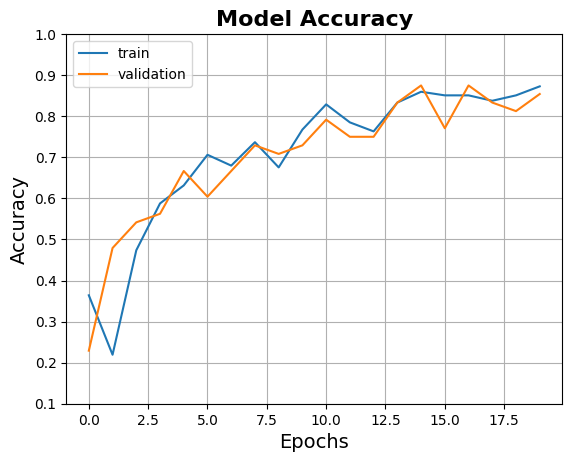

In [75]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.1, ymax=1)
plt.grid()
plt.title('Model Accuracy',fontsize=16,weight='bold')
plt.ylabel('Accuracy',fontsize=14)
plt.xlabel('Epochs',fontsize=14)
plt.legend(['train','validation'])
plt.show()


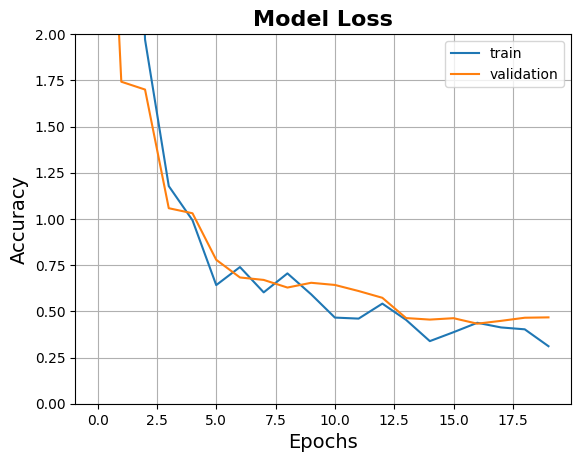

In [74]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.axis(ymin=0, ymax=2.0)
plt.grid()
plt.title('Model Loss',fontsize=16,weight='bold')
plt.ylabel('Accuracy',fontsize=14)
plt.xlabel('Epochs',fontsize=14)
plt.legend(['train','validation'])
plt.show()

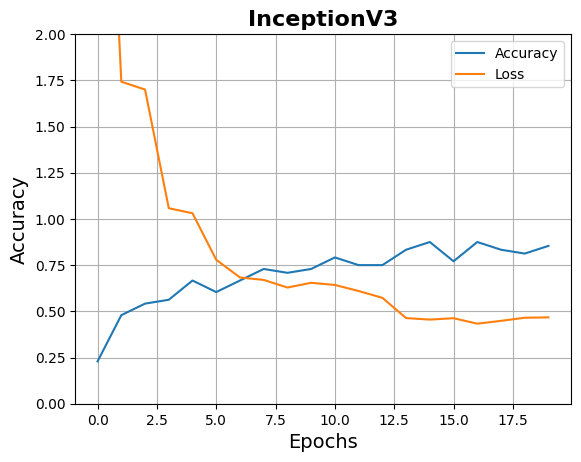

In [77]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['val_loss'])
plt.axis(ymin=0, ymax=2.0)
plt.grid()
plt.title('InceptionV3',fontsize=16,weight='bold')
plt.ylabel('Accuracy',fontsize=14)
plt.xlabel('Epochs',fontsize=14)
plt.legend(['Accuracy','Loss'])
plt.show()

In [63]:
predictions = Inception_model.predict(val_ds)

3/3 [==============================] - 2s 506ms/step


In [64]:
predictions

array([[9.96465743e-01, 2.08001491e-03, 1.45436428e-03],
       [9.96465743e-01, 2.08001491e-03, 1.45436428e-03],
       [9.99825478e-01, 1.49809566e-04, 2.47822263e-05],
       [9.99825478e-01, 1.49809566e-04, 2.47822263e-05],
       [9.99995887e-01, 3.68641895e-06, 3.70990961e-07],
       [9.99995887e-01, 3.68641895e-06, 3.70990961e-07],
       [9.99995887e-01, 3.68641895e-06, 3.70990961e-07],
       [9.99995887e-01, 3.68641895e-06, 3.70990961e-07],
       [9.99995887e-01, 3.68641895e-06, 3.70990961e-07],
       [9.99995887e-01, 3.68641895e-06, 3.70990961e-07],
       [9.11669493e-01, 8.82734656e-02, 5.70865122e-05],
       [9.11669493e-01, 8.82734656e-02, 5.70865122e-05],
       [4.85918559e-02, 7.71714091e-01, 1.79694057e-01],
       [4.85918559e-02, 7.71714091e-01, 1.79694057e-01],
       [4.85918559e-02, 7.71714091e-01, 1.79694057e-01],
       [4.85918559e-02, 7.71714091e-01, 1.79694057e-01],
       [2.03143880e-02, 8.77439320e-01, 1.02246329e-01],
       [2.01260671e-03, 9.96069

In [65]:
rounded_predictions = np.argmax(predictions, axis=-1)
rounded_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2])

In [66]:
true_labels = []
labels = list(val_ds.map(lambda x, y: y))[0]
labels_1 = list(val_ds.map(lambda x, y: y))[1]
labels_2 = list(val_ds.map(lambda x, y: y))[2]
for label in labels:
  true_labels.append(np.argmax(label))

for label in labels_1:
  true_labels.append(np.argmax(label))

for label in labels_2:
  true_labels.append(np.argmax(label))



print(len(true_labels))
print(true_labels)

48
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [67]:
train_labels = []
labels = list(train_ds.map(lambda x, y: y))[0]
labels_1 = list(train_ds.map(lambda x, y: y))[1]
labels_2 = list(train_ds.map(lambda x, y: y))[2]
labels_3 = list(train_ds.map(lambda x, y: y))[3]
labels_4 = list(train_ds.map(lambda x, y: y))[4]
labels_5 = list(train_ds.map(lambda x, y: y))[5]
labels_6 = list(train_ds.map(lambda x, y: y))[6]
labels_7 = list(train_ds.map(lambda x, y: y))[7]
labels_8 = list(train_ds.map(lambda x, y: y))[8]
labels_9 = list(train_ds.map(lambda x, y: y))[9]
labels_10 = list(train_ds.map(lambda x, y: y))[10]
labels_11 = list(train_ds.map(lambda x, y: y))[11]
labels_12 = list(train_ds.map(lambda x, y: y))[12]
labels_13 = list(train_ds.map(lambda x, y: y))[13]
labels_14 = list(train_ds.map(lambda x, y: y))[14]


for label in labels:
  train_labels.append(np.argmax(label))

for label in labels_1:
  train_labels.append(np.argmax(label))

for label in labels_2:
  train_labels.append(np.argmax(label))

for label in labels_3:
  train_labels.append(np.argmax(label))

for label in labels_4:
  train_labels.append(np.argmax(label))

for label in labels_5:
  train_labels.append(np.argmax(label))

for label in labels_6:
  train_labels.append(np.argmax(label))

for label in labels_7:
  train_labels.append(np.argmax(label))

for label in labels_8:
  train_labels.append(np.argmax(label))

for label in labels_9:
  train_labels.append(np.argmax(label))

for label in labels_10:
  train_labels.append(np.argmax(label))

for label in labels_11:
  train_labels.append(np.argmax(label))

for label in labels_12:
  train_labels.append(np.argmax(label))

for label in labels_13:
  train_labels.append(np.argmax(label))

for label in labels_14:
  train_labels.append(np.argmax(label))


print(len(train_labels))
print(train_labels)

228
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [68]:
from sklearn.metrics import confusion_matrix
import itertools

In [69]:
cm = confusion_matrix(true_labels, rounded_predictions)

In [71]:
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
  plt.imshow(cm, cmap=cmap)
  plt.title(title,weight='bold', fontsize=16)
  plt.colorbar()
  # tick_marks = np.arrange(len(classes))
  # plt.xticks(tick_marks, classes, rotation=45)
  # plt.yticks(tick_marks, classes)

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print('Normalize confusion matrix')
  else:
    print('Confusion Matrix, without normalization')
  print(cm)


  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(i,j ,cm[j,i],
            horizontalalignment="center", weight='bold',fontsize=16,
            color="white" if cm[j,i] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label',fontsize=14)
  plt.xlabel('Predicted label',fontsize=14)

Confusion Matrix, without normalization
[[12  4  0]
 [ 2 13  1]
 [ 0  0 16]]


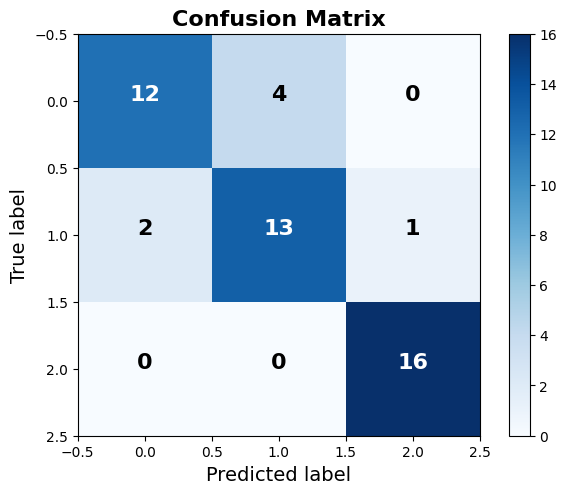

In [72]:
cm_plot_labels = ['healthy', 'phase', 'ground']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [73]:
from sklearn.metrics import classification_report
Y_pred = Inception_model.predict(train_ds)
y_pred = np.argmax(Y_pred, axis=-1)


print(classification_report(train_labels, y_pred))

15/15 [==============================] - 7s 466ms/step
              precision    recall  f1-score   support

           0       0.94      0.84      0.89        76
           1       0.77      0.88      0.82        76
           2       0.93      0.89      0.91        76

    accuracy                           0.87       228
   macro avg       0.88      0.87      0.87       228
weighted avg       0.88      0.87      0.87       228

